**Title**: Data Wrangling 7.2 Exercises  
**Author**: Ryan Weeks  
**Date**: 1/26/2025  
**Description**: These exercises focus on how to analyze and visualize stock data by calculating and plotting key metrics like after-hours trading effects, weekly price changes, and monthly trends. I also learned how to resample, aggregate, and create different types of plots to uncover insights from time-series data.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(r"C:\Users\Weekseey\Documents\Bellevue Work\Data Wrangling\fb_stock_prices_2018.csv", index_col='date', parse_dates=True)
quakes = pd.read_csv(r"C:\Users\Weekseey\Documents\Bellevue Work\Data Wrangling\earthquakes.csv")

# 1.

<Axes: title={'center': 'Rolling 20D Minimum Closing Price of Facebook Stock'}, xlabel='date'>

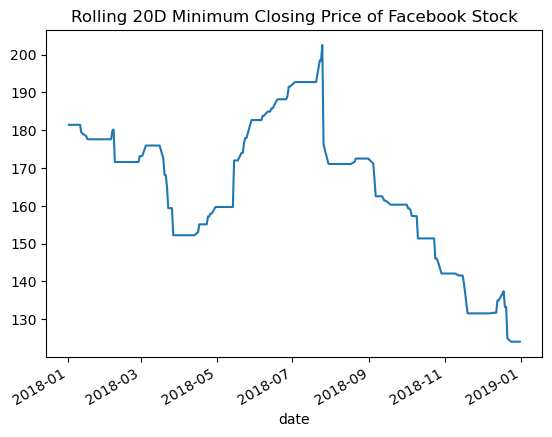

In [4]:
# Calculate the rolling 20 day minimum
fb.close.rolling('20D').min().plot(
    # Set title for plot
    title='Rolling 20D Minimum Closing Price of Facebook Stock'
)

# 2.

<Axes: title={'center': "Facebook Stock Price's Daily Change from Open to Close"}, ylabel='Density'>

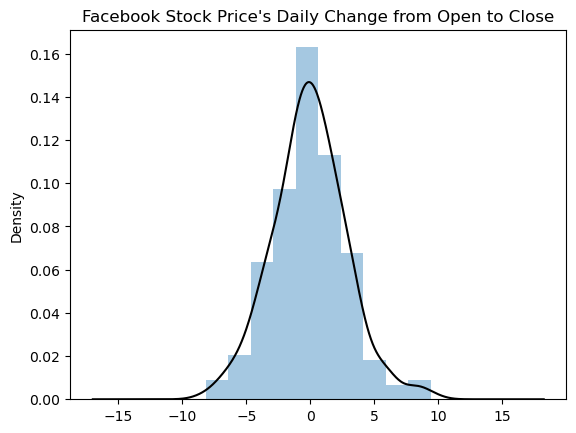

In [6]:
# Calculate the daily difference between opening and closing prices of Facebook stock
differential = fb.open - fb.close

# Create a histogram of the daily differences with normalized density and some transparency
ax = differential.plot(kind='hist', density=True, alpha=0.4)

# Overlay a kernel density estimation (KDE) plot on the histogram
differential.plot(
    kind='kde', color='black', ax=ax,  # Use the same axis as the histogram
    # Set the title for the plot
    title='Facebook Stock Price\'s Daily Change from Open to Close'
)

# 3.

mb            Axes(0.1,0.15;0.173913x0.75)
ms_20    Axes(0.308696,0.15;0.173913x0.75)
mwr      Axes(0.517391,0.15;0.173913x0.75)
mww      Axes(0.726087,0.15;0.173913x0.75)
dtype: object

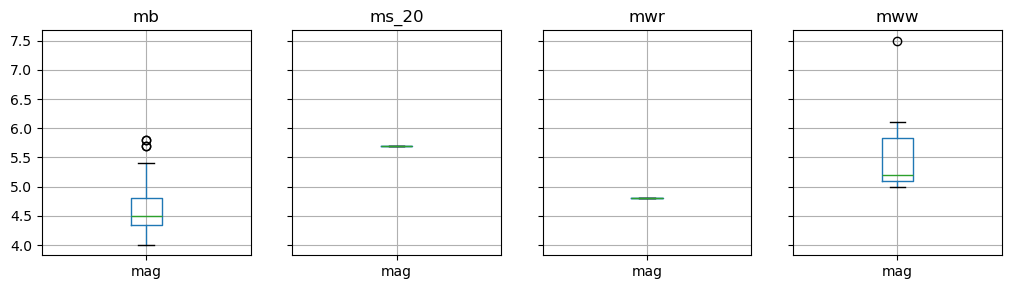

In [8]:
# Filter the earthquakes dataset for rows where the location is "Indonesia"
indonesia_quakes = quakes.query('parsed_place == "Indonesia"')

# Select only the magnitude (mag) and magnitude type (magType) columns
indonesia_mag_data = indonesia_quakes[['mag', 'magType']]

# Group the data by magnitude type and create box plots for each group
indonesia_mag_data.groupby('magType').boxplot(
    layout=(1, 4),  # Arrange the plots in 1 row and up to 4 columns
    figsize=(12, 3)  # Set the figure size
)

# 4.

<Axes: title={'center': 'Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock'}, xlabel='date'>

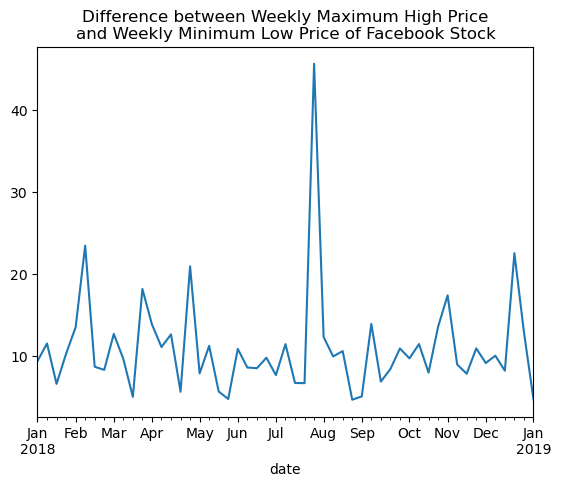

In [10]:
# Resample the Facebook stock data to weekly frequency and calculate weekly maximum high and minimum low prices
weekly_data = fb.resample('1W').agg(
    dict(high='max', low='min')  # Aggregate: max for 'high' and min for 'low'
)

# Add a new column for the weekly difference between the max high and min low prices
weekly_data = weekly_data.assign(
    max_change_weekly=lambda x: x.high - x.low  # Calculate the difference
)

# Plot the weekly maximum change
weekly_data.max_change_weekly.plot(
    title='Difference between Weekly Maximum High Price\n'
          'and Weekly Minimum Low Price of Facebook Stock'
)

# 6.

<Axes: title={'center': 'After hours trading monthly effect'}, xlabel='date'>

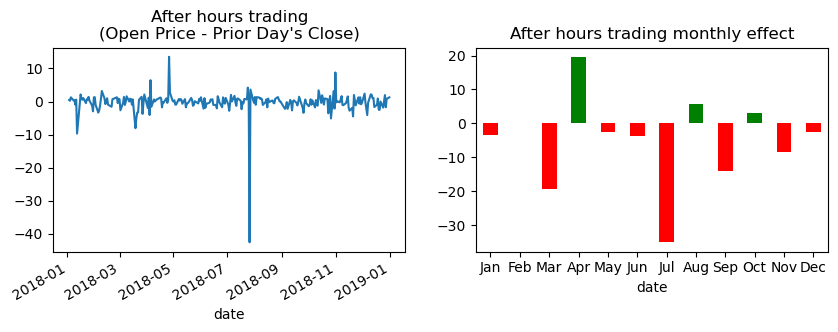

In [12]:
# Calculate the after-hours trading effect as the difference between open price and prior day's close
series = (fb.open - fb.close.shift())

# Resample the series to monthly-end frequency and calculate the sum for each month
monthly_effect = series.resample('ME').sum()

# Create a figure with two subplots, arranged in one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot the daily after-hours trading effect
series.plot(
    ax = axes[0],  # Plot on the first subplot
    title = 'After hours trading\n(Open Price - Prior Day\'s Close)' 
)

# Format the index of the monthly effect to display abbreviated month names
monthly_effect.index = monthly_effect.index.strftime('%b')

# Plot the monthly after-hours trading effect as a bar chart
monthly_effect.plot(
    ax = axes[1],  # Plot on the second subplot
    kind = 'bar',  # Bar chart
    title = 'After hours trading monthly effect', 
    color = np.where(monthly_effect >= 0, 'g', 'r'),  # Green for positive, red for negative
    rot = 0  # Rotate x-axis labels to horizontal
)